# MathAData - Module introduction à l'IA

## Classification des images de 2 et de 7
Dans ce Notebook, nous allons construire un algorithme permettant de reconnaître des images de 2 et de 7.

In [1]:
import utilitaires.utilitaires_common
from utilitaires.utilitaires_intro import *

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Chargement de la base de donnée d'images en cours...
Images chargées !


Error during http request
HTTPConnectionPool(host='localhost', port=3000): Max retries exceeded with url: /api/notebooks/session (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x13d9d7ed0>: Failed to establish a new connection: [Errno 61] Connection refused'))
Error during http request
HTTPConnectionPool(host='localhost', port=8000): Max retries exceeded with url: /api/participants/challenges/116/highscore?capytale_id=-1 (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x13d9e65d0>: Failed to establish a new connection: [Errno 61] Connection refused'))


## 1. Image numérique

#### Une image en niveaux de gris : tableau 2D de pixels  
Une image en niveau de gris est un tableau deux dimensions. Chaque pixel de l'image correspond à un élément du tableau. Chaque élément est un entier compris entre 0 et 255, du plus foncé au plus clair, donc 0 pour noir et 255 pour blanc.  
Les images dans ce TP font $28 \times 28$ pixels.

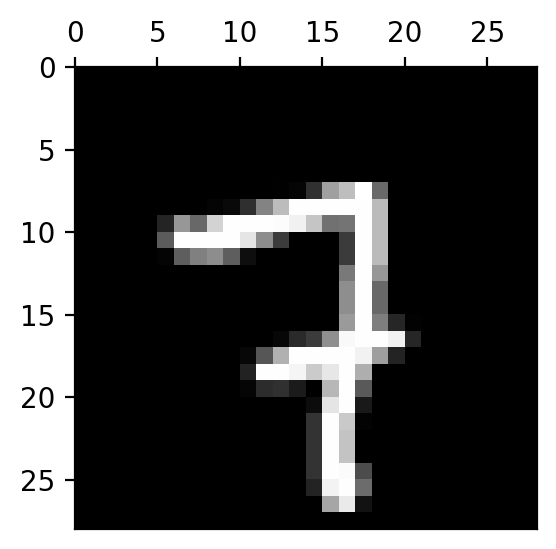

In [4]:
# Affichage de l'image
affichage(d)

In [10]:
# Valeur de l'image
affichage_tableau(d)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0,1,5,49,160,190,255,106,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,4,9,47,131,188,254,254,254,254,254,187,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,37,151,104,211,254,254,254,252,241,197,113,116,254,187,0,0,0,0,0,0,0,0,0
